# 2D Planet Simulator to Generate Data for ML Inferred Physics

Author: Craig Boger
06/08/2020

Notes:
This version uses the whole dataset to fit a scaler.  I then attempt to inverse_transform the data at the end.  To run the data through the inverse_transformer, I need to merge the input tuple with the predicted value.  For some reason, I can't transform data of a different dimension from the data that was originally fitted.

Looks like the simulator is 2D, but can be changed to 3D if needed.

This is a script to generate some quick simulated data for orbiting objects in a 2D space to fead into a neural network to predict the next position of a body traveling through a system.

## Straight Up Just Stealing Someone's Code and Trying to Run It

Credit to benrules2: https://gist.github.com/benrules2/220d56ea6fe9a85a4d762128b11adfba

In [1]:
import math
import random
%matplotlib widget
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D

class point:
    def __init__(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z

class body:
    def __init__(self, location, mass, velocity, name = ""):
        self.location = location
        self.mass = mass
        self.velocity = velocity
        self.name = name

def calculate_single_body_acceleration(bodies, body_index):
    G_const = 6.67408e-11 #m3 kg-1 s-2
    acceleration = point(0,0,0)
    target_body = bodies[body_index]
    for index, external_body in enumerate(bodies):
        if index != body_index:
            r = (target_body.location.x - external_body.location.x)**2 + (target_body.location.y - external_body.location.y)**2 + (target_body.location.z - external_body.location.z)**2
            r = math.sqrt(r)
            tmp = G_const * external_body.mass / r**3
            acceleration.x += tmp * (external_body.location.x - target_body.location.x)
            acceleration.y += tmp * (external_body.location.y - target_body.location.y)
            acceleration.z += tmp * (external_body.location.z - target_body.location.z)

    return acceleration

def compute_velocity(bodies, time_step = 1):
    for body_index, target_body in enumerate(bodies):
        acceleration = calculate_single_body_acceleration(bodies, body_index)

        target_body.velocity.x += acceleration.x * time_step
        target_body.velocity.y += acceleration.y * time_step
        target_body.velocity.z += acceleration.z * time_step 


def update_location(bodies, time_step = 1):
    for target_body in bodies:
        target_body.location.x += target_body.velocity.x * time_step
        target_body.location.y += target_body.velocity.y * time_step
        target_body.location.z += target_body.velocity.z * time_step

def compute_gravity_step(bodies, time_step = 1):
    compute_velocity(bodies, time_step = time_step)
    update_location(bodies, time_step = time_step)

def plot_output(bodies, outfile = None):
    fig = plot.figure()
    colours = ['r','b','g','y','m','c']
    ax = fig.add_subplot(1,1,1, projection='3d')
    max_range = 0
    for current_body in bodies: 
        max_dim = max(max(current_body["x"]),max(current_body["y"]),max(current_body["z"]))
        if max_dim > max_range:
            max_range = max_dim
        ax.plot(current_body["x"], current_body["y"], current_body["z"], c = random.choice(colours), label = current_body["name"])        
    
    ax.set_xlim([-max_range,max_range])    
    ax.set_ylim([-max_range,max_range])
    ax.set_zlim([-max_range,max_range])
    ax.legend()        

    if outfile:
        plot.savefig(outfile)
    else:
        plot.show()

def run_simulation(bodies, names = None, time_step = 1, number_of_steps = 10000, report_freq = 100):

    #create output container for each body
    body_locations_hist = []
    for current_body in bodies:
        body_locations_hist.append({"x":[], "y":[], "z":[], "name":current_body.name})
        
    for i in range(1,number_of_steps):
        compute_gravity_step(bodies, time_step = 1000)            
        
        if i % report_freq == 0:
            for index, body_location in enumerate(body_locations_hist):
                body_location["x"].append(bodies[index].location.x)
                body_location["y"].append(bodies[index].location.y)           
                body_location["z"].append(bodies[index].location.z)       

    return body_locations_hist        
            
#planet data (location (m), mass (kg), velocity (m/s)
sun = {"location":point(0,0,0), "mass":2e30, "velocity":point(0,0,0)}
mercury = {"location":point(0,5.7e10,0), "mass":3.285e23, "velocity":point(47000,0,0)}
venus = {"location":point(0,1.1e11,0), "mass":4.8e24, "velocity":point(35000,0,0)}
earth = {"location":point(0,1.5e11,0), "mass":6e24, "velocity":point(30000,0,0)}
mars = {"location":point(0,2.2e11,0), "mass":2.4e24, "velocity":point(24000,0,0)}
jupiter = {"location":point(0,7.7e11,0), "mass":1e28, "velocity":point(13000,0,0)}
saturn = {"location":point(0,1.4e12,0), "mass":5.7e26, "velocity":point(9000,0,0)}
uranus = {"location":point(0,2.8e12,0), "mass":8.7e25, "velocity":point(6835,0,0)}
neptune = {"location":point(0,4.5e12,0), "mass":1e26, "velocity":point(5477,0,0)}
pluto = {"location":point(0,3.7e12,0), "mass":1.3e22, "velocity":point(4748,0,0)}
# TODO: Add random sattellite here.
satellite_1 = {"location":point(1e5,3.7e5,0), "mass":1.7e1, "velocity":point(4748,0,0)}

if __name__ == "__main__":

    #build list of planets in the simulation, or create your own
    bodies = [
        body( location = sun["location"], mass = sun["mass"], velocity = sun["velocity"], name = "sun"),
        body( location = earth["location"], mass = earth["mass"], velocity = earth["velocity"], name = "earth"),
        body( location = mars["location"], mass = mars["mass"], velocity = mars["velocity"], name = "mars"),
        body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "venus"),
        body( location = mercury["location"], mass = mercury["mass"], velocity = mercury["velocity"], name = "mercury"),
        body( location = jupiter["location"], mass = jupiter["mass"], velocity = jupiter["velocity"], name = "jupiter"),
        body( location = saturn["location"], mass = saturn["mass"], velocity = saturn["velocity"], name = "saturn"),
        
        #body( location = satellite_1["location"], mass = satellite_1["mass"], velocity = satellite_1["velocity"], name = "sattellite_1")
        ]
    
    # Original defaults of simulation
    # motions = run_simulation(bodies, time_step = 100, number_of_steps = 80000, report_freq = 1000)
    # Try messing with report frequency to get more data.
    motions = run_simulation(bodies, time_step = 100, number_of_steps = 300000, report_freq = 100)
    plot_output(motions, outfile = 'orbits.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Take motions data from the above simulation and convert it to a Pandas dataframe.  The "motions" output is a list of python dictionaries that can be converted into a dataframe and then manipulated.

In [2]:
import pandas as pd
import numpy as np

motions_df = pd.DataFrame(motions)
motions_df.head(100)

,x,y,z,name
0,"[6.172247210875407, 49.37608388489302, 166.613...","[6056.974666438165, 24107.571980251058, 54150....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",sun
1,"[2999802268.7576785, 5998418130.158717, 899466...","[149970049800.53976, 149880804272.02502, 14973...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",earth
2,"[2399949856.0043564, 4799598821.688435, 719864...","[219986083529.99896, 219944611139.58228, 21987...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mars
3,"[3499415066.461402, 6995320910.112684, 1048421...","[109944304437.46532, 109778376868.05923, 10950...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",venus
4,"[4694355206.034602, 9354859805.633783, 1394777...","[56792631335.43017, 56175843268.08082, 5515329...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mercury
5,"[1299999366.480654, 2599994931.4665866, 389998...","[769998863548.677, 769995476701.667, 769989839...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",jupiter
6,"[899999928.8208524, 1799999430.5240006, 269999...","[1399999647585.8357, 1399998597321.9666, 13999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",saturn


In [3]:
# Trying to separate out each row of list or dataframe into its own dataframe.
# Will later put these dataframes back together into 1 large dataframe.

motions_df_list = []
for body in motions:
    motions_df_list.append(pd.DataFrame(body))

In [4]:
motions_df_list[3]

,x,y,z,name
0,3.499415e+09,1.099443e+11,0.0,venus
1,6.995321e+09,1.097784e+11,0.0,venus
2,1.048421e+10,1.095024e+11,0.0,venus
3,1.396259e+10,1.091166e+11,0.0,venus
4,1.742697e+10,1.086215e+11,0.0,venus
...,...,...,...,...
2994,-5.289650e+10,8.213631e+10,0.0,venus
2995,-5.030464e+10,8.447291e+10,0.0,venus
2996,-4.763994e+10,8.672745e+10,0.0,venus
2997,-4.490500e+10,8.889761e+10,0.0,venus


In [5]:
# Combine the dataframes into a single, large dataframe.
# Can later choose a planet to be the target we train to predict.
complete_motion_df = None

for body in motions_df_list:
    # Append name of body to each column and remove the name column
    body_name = body.loc[0, "name"]
    body.columns = [body_name + "_x",
                    body_name + "_y",
                    body_name + "_z",
                    "name"]
    # Add current body to the complete dataframe.
    complete_motion_df = pd.concat([complete_motion_df, body.iloc[:, 0:3]], axis=1)

complete_motion_df.head(100)

,sun_x,sun_y,sun_z,earth_x,earth_y,earth_z,mars_x,mars_y,mars_z,venus_x,...,venus_z,mercury_x,mercury_y,mercury_z,jupiter_x,jupiter_y,jupiter_z,saturn_x,saturn_y,saturn_z
0,6.172247e+00,6.056975e+03,0.0,2.999802e+09,1.499700e+11,0.0,2.399950e+09,2.199861e+11,0.0,3.499415e+09,...,0.0,4.694355e+09,5.679263e+10,0.0,1.299999e+09,7.699989e+11,0.0,8.999999e+08,1.400000e+12,0.0
1,4.937608e+01,2.410757e+04,0.0,5.998418e+09,1.498808e+11,0.0,4.799599e+09,2.199446e+11,0.0,6.995321e+09,...,0.0,9.354860e+09,5.617584e+10,0.0,2.599995e+09,7.699955e+11,0.0,1.799999e+09,1.399999e+12,0.0
2,1.666139e+02,5.415063e+04,0.0,8.994662e+09,1.497323e+11,0.0,7.198646e+09,2.198756e+11,0.0,1.048421e+10,...,0.0,1.394778e+10,5.515330e+10,0.0,3.899983e+09,7.699898e+11,0.0,2.699998e+09,1.399997e+12,0.0
3,3.948280e+02,9.618418e+04,0.0,1.198735e+10,1.495246e+11,0.0,9.596791e+09,2.197790e+11,0.0,1.396259e+10,...,0.0,1.843961e+10,5.373113e+10,0.0,5.199959e+09,7.699820e+11,0.0,3.599995e+09,1.399994e+12,0.0
4,7.708690e+02,1.502055e+05,0.0,1.497529e+10,1.492578e+11,0.0,1.199373e+10,2.196549e+11,0.0,1.742697e+10,...,0.0,2.279721e+10,5.191794e+10,0.0,6.499921e+09,7.699718e+11,0.0,4.499991e+09,1.399991e+12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.138605e+06,5.394756e+07,0.0,1.441446e+11,-4.894462e+10,0.0,1.875072e+11,1.033965e+11,0.0,1.578892e+10,...,0.0,3.050288e+10,-4.133032e+10,0.0,1.242400e+11,7.596504e+11,0.0,8.633698e+10,1.396785e+12,0.0
96,4.259034e+06,5.506067e+07,0.0,1.431961e+11,-5.174263e+10,0.0,1.885864e+11,1.011770e+11,0.0,1.238219e+10,...,0.0,2.606635e+10,-4.407853e+10,0.0,1.255223e+11,7.594341e+11,0.0,8.723499e+10,1.396718e+12,0.0
97,4.381576e+06,5.618472e+07,0.0,1.421936e+11,-5.452104e+10,0.0,1.896398e+11,9.894374e+10,0.0,8.963735e+09,...,0.0,2.137176e+10,-4.638960e+10,0.0,1.268043e+11,7.592156e+11,0.0,8.813296e+10,1.396650e+12,0.0
98,4.506234e+06,5.731969e+07,0.0,1.411373e+11,-5.727882e+10,0.0,1.906674e+11,9.669701e+10,0.0,5.536788e+09,...,0.0,1.646399e+10,-4.823713e+10,0.0,1.280859e+11,7.589949e+11,0.0,8.903089e+10,1.396581e+12,0.0


In [6]:
complete_motion_df.shape

(2999, 21)

At this point, we have a single dataframe with all bodies and all positions with each time step as the index of our rows.

### Checking for any NA values that could be messing up optimizer calculations in Tensorflow

In [7]:
complete_motion_df.isnull().any()
# Doesn't look like any null or missing values.

sun_x        False
sun_y        False
sun_z        False
earth_x      False
earth_y      False
earth_z      False
mars_x       False
mars_y       False
mars_z       False
venus_x      False
venus_y      False
venus_z      False
mercury_x    False
mercury_y    False
mercury_z    False
jupiter_x    False
jupiter_y    False
jupiter_z    False
saturn_x     False
saturn_y     False
saturn_z     False
dtype: bool

# Try a Quick Neural Net for Predicting Coordinates of Planet at Furthest Right Columns in the Dataset

Basic Regression with Tensorflow: https://www.tensorflow.org/tutorials/keras/regression


### Imports

In [8]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
# Probably not needed since not using regressor or doing any feature engineering.
import sklearn
from sklearn.preprocessing import StandardScaler  # Scaler for normalizing data.
from sklearn.preprocessing import MinMaxScaler  # Scaler for normalizing data.
from sklearn.compose import ColumnTransformer   # Used to apply scaling and standardization per column in a dataframe.
assert sklearn.__version__ >= "0.20" 

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
# Recommended to enable eager execution when developing model.
# Processing data: https://www.youtube.com/watch?v=oFFbKogYdfc
# tf.enable_eager_execution()

# Import Keras
from tensorflow import keras
# Plot NN model
from tensorflow.keras.utils import plot_model


# to make this notebook's output stable across runs
#np.random.seed(42)

# Use sklearn for data processing


# Common imports
import numpy as np
import os

In [9]:
tf.__version__

'2.2.0'

In [10]:
keras.__version__

'2.3.0-tf'

## Randomize Data, Normalize Data, and Convert Pandas Dataframe to Numpy Arrays for Input to NN

Randomize rows in dataframe before training, validation, and test splitting of data.  Shuffle dataframe in place and reset index.\ 
https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows

In [11]:
complete_motion_df = complete_motion_df.sample(frac=1).reset_index(drop=True)
complete_motion_df.head(10)

,sun_x,sun_y,sun_z,earth_x,earth_y,earth_z,mars_x,mars_y,mars_z,venus_x,...,venus_z,mercury_x,mercury_y,mercury_z,jupiter_x,jupiter_y,jupiter_z,saturn_x,saturn_y,saturn_z
0,1.405664e+10,7.542777e+09,0.0,6.037632e+10,1.502597e+11,0.0,-1.946373e+11,5.221447e+09,0.0,-7.900156e+10,...,0.0,2.272649e+09,-4.203825e+10,0.0,-2.440359e+11,-6.709773e+11,0.0,1.190684e+12,2.167619e+11,0.0
1,1.372607e+10,7.591074e+09,0.0,-1.404636e+10,1.550073e+11,0.0,-1.814618e+11,-5.682980e+10,0.0,-1.039657e+10,...,0.0,5.889798e+10,3.998490e+10,0.0,-2.117577e+11,-6.821100e+11,0.0,1.189879e+12,2.431743e+11,0.0
2,2.178980e+08,9.105269e+08,0.0,1.512324e+11,-1.520417e+10,0.0,-2.030778e+11,6.031428e+10,0.0,1.240622e+10,...,0.0,-1.277627e+10,5.632192e+10,0.0,4.861561e+11,5.912948e+11,0.0,3.605965e+11,1.342757e+12,0.0
3,1.399073e+10,7.553034e+09,0.0,4.582719e+10,1.541399e+11,0.0,-1.935362e+11,-7.394345e+09,0.0,-6.857997e+10,...,0.0,2.824719e+10,-4.140103e+10,0.0,-2.376230e+11,-6.733231e+11,0.0,1.190569e+12,2.220530e+11,0.0
4,3.248578e+09,4.845908e+09,0.0,1.544585e+11,-9.019273e+09,0.0,1.830543e+10,2.242602e+11,0.0,1.105773e+11,...,0.0,4.112504e+10,-3.042271e+10,0.0,7.217729e+11,-1.778261e+11,0.0,8.585058e+11,1.027702e+12,0.0
5,3.240185e+09,4.839233e+09,0.0,1.546586e+11,-6.069225e+09,0.0,1.590221e+10,2.244119e+11,0.0,1.096264e+11,...,0.0,4.460707e+10,-2.661777e+10,0.0,7.221341e+11,-1.765339e+11,0.0,8.578514e+11,1.028392e+12,0.0
6,1.239775e+10,7.707419e+09,0.0,-1.164986e+11,-7.408317e+10,0.0,2.066874e+10,-1.908252e+11,0.0,4.243249e+10,...,0.0,-4.064145e+10,1.295822e+09,0.0,-7.980225e+10,-7.112031e+11,0.0,1.181164e+12,3.465329e+11,0.0
7,7.876812e+09,7.180108e+09,0.0,-8.439494e+10,-1.149951e+11,0.0,-1.628647e+11,1.385039e+11,0.0,9.557341e+10,...,0.0,-4.564263e+10,4.040549e+09,0.0,3.687448e+11,-6.246677e+11,0.0,1.089360e+12,6.791039e+11,0.0
8,7.073952e+08,1.959148e+09,0.0,-9.075952e+10,1.212946e+11,0.0,1.801106e+11,1.200948e+11,0.0,2.237007e+10,...,0.0,-1.408636e+10,5.688945e+10,0.0,6.550259e+11,3.855363e+11,0.0,5.325853e+11,1.271497e+12,0.0
9,2.113176e+03,2.941966e+05,0.0,2.093224e+10,1.485473e+11,0.0,1.678280e+10,2.193242e+11,0.0,2.429986e+10,...,0.0,3.097984e+10,4.716547e+10,0.0,9.099783e+09,7.699448e+11,0.0,6.299976e+09,1.399983e+12,0.0


### Data Scaling Method

Fitting a MinMaxScaler to the entire dataset.  Will try later to see if I can inverse_transform predicted values be combining them with their initial input values.  When I tried just feeding the predicted values into the inverse_transform, it had issues with the smaller data dimensions.

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Why normalize data?
https://www.jeremyjordan.me/batch-normalization/
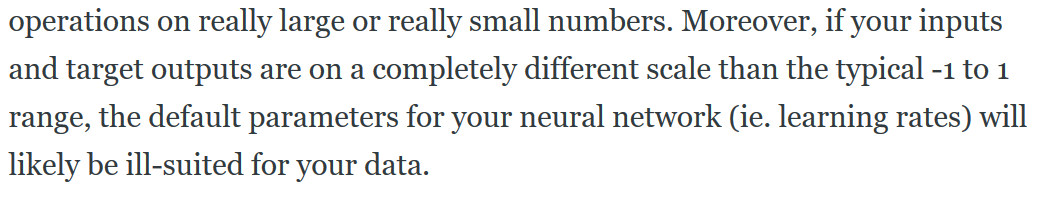

In [12]:
# Create an sklearn scaler and fit our data to the scaler with a range of -1 to 1
scaler = MinMaxScaler(feature_range=(-1,1))
# Fit the scaler to the provided data set.
scaler.fit(complete_motion_df.values)
# Apply the transformation.  Create Numpy ndarrays with scaled data from dataframe.  Indexes and column labels don't survive.
scaled_data = scaler.transform(complete_motion_df.values)
# Overwrite previous dataframe with scaled data and carry indexes and column labels over.
complete_motion_df = pd.DataFrame(scaled_data, index=complete_motion_df.index, columns=complete_motion_df.columns)

complete_motion_df.head(100)

,sun_x,sun_y,sun_z,earth_x,earth_y,earth_z,mars_x,mars_y,mars_z,venus_x,...,venus_z,mercury_x,mercury_y,mercury_z,jupiter_x,jupiter_y,jupiter_z,saturn_x,saturn_y,saturn_z
0,0.227141,0.954055,-1.0,0.300189,0.953121,-1.0,-0.935411,-0.043815,-1.0,-0.737911,...,-1.0,-0.139401,-0.847065,-1.0,-0.346953,-0.938166,-1.0,0.999611,-0.074197,-1.0
1,0.198282,0.966567,-1.0,-0.156144,0.983671,-1.0,-0.875476,-0.335433,-1.0,-0.176735,...,-1.0,0.729127,0.572558,-1.0,-0.303187,-0.953140,-1.0,0.998259,-0.050218,-1.0
2,-0.980978,-0.764117,-1.0,0.857285,-0.111604,-1.0,-0.973807,0.215102,-1.0,0.009788,...,-1.0,-0.370224,0.855312,-1.0,0.643123,0.759636,-1.0,-0.395476,0.948033,-1.0
3,0.221387,0.956712,-1.0,0.210979,0.978090,-1.0,-0.930402,-0.103104,-1.0,-0.652665,...,-1.0,0.259001,-0.836036,-1.0,-0.338258,-0.941321,-1.0,0.999418,-0.069393,-1.0
4,-0.716400,0.255395,-1.0,0.877067,-0.071806,-1.0,0.033268,0.985588,-1.0,0.812810,...,-1.0,0.456523,-0.646028,-1.0,0.962599,-0.274860,-1.0,0.441336,0.662011,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.906872,-0.342970,-1.0,0.806140,0.337838,-1.0,0.742259,-0.558757,-1.0,-0.072285,...,-1.0,0.577716,-0.446674,-1.0,0.941381,0.331157,-1.0,0.020785,0.845112,-1.0
96,-0.313459,0.859177,-1.0,-0.573163,-0.765114,-1.0,-0.797317,0.573087,-1.0,0.706923,...,-1.0,-0.862161,-0.135305,-1.0,0.485539,-0.874988,-1.0,0.828650,0.346367,-1.0
97,-0.993069,-0.881377,-1.0,-0.681986,0.713094,-1.0,-0.341058,-0.952251,-1.0,0.361797,...,-1.0,0.562927,0.364539,-1.0,0.466591,0.879287,-1.0,-0.573207,0.974332,-1.0
98,-0.916747,-0.387127,-1.0,0.518269,0.751530,-1.0,0.872810,-0.263413,-1.0,0.597141,...,-1.0,-0.463985,0.842442,-1.0,0.924070,0.375937,-1.0,-0.015303,0.856627,-1.0


In [13]:
# Assuming last 3 columns in the dataframe are the target x,y, and z values.  
target = complete_motion_df.iloc[:,-3:]
# Drop target from main dataframe.
complete_motion_df.drop(complete_motion_df.iloc[:,-3:], axis = 1, inplace = True)
target.head(5)

,saturn_x,saturn_y,saturn_z
0,0.999611,-0.074197,-1.0
1,0.998259,-0.050218,-1.0
2,-0.395476,0.948033,-1.0
3,0.999418,-0.069393,-1.0
4,0.441336,0.662011,-1.0


Split the x, y, and z coordinates out for the target to use a specific dataset for each possible coordinate output.

In [14]:
target_x = target.iloc[:,0]
target_y = target.iloc[:,1]
target_z = target.iloc[:,2]

Convert all pandas dataframes to numpy arrays so they are compatible with Tensorflow.

In [15]:
complete_motion_np = complete_motion_df.to_numpy()
target_np = target.to_numpy()
target_x_np = target_x.to_numpy()
target_y_np = target_y.to_numpy()
target_z_np = target_z.to_numpy()

Split into train, validation, and test datasets.

In [16]:
#Split into train, validation, and test sets.
# Setup train, validation, and test splits
DATASET_SIZE = len(complete_motion_df)
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

X_train, X_valid, X_test = complete_motion_np[:train_size], complete_motion_np[train_size:(train_size+val_size)], complete_motion_np[(train_size + val_size):]
y_train_x, y_valid_x, y_test_x = target_x_np[:train_size], target_x_np[train_size:(train_size+val_size)], target_x_np[(train_size + val_size):]
y_train_y, y_valid_y, y_test_y = target_y_np[:train_size], target_y_np[train_size:(train_size+val_size)], target_y_np[(train_size + val_size):]
y_train_z, y_valid_z, y_test_z = target_z_np[:train_size], target_z_np[train_size:(train_size+val_size)], target_z_np[(train_size + val_size):]

## Try Creating Single Input, Multiple Output Regression Model

Trying to create a regression NN where instead of designating an output layer of 3 nodes, 3 output layers of a single node are used to designate specific datasets and loss functions.  Still need to figure out later how to get a 3 node output to correspond to the input training data.

Use functional API to build basic NN architecture.

In [17]:
# Use functional API to build basic NN architecture.
input_main = keras.layers.Input(shape=complete_motion_np.shape[1:])
hidden1 = keras.layers.Dense(300, activation="tanh")(input_main)
hidden2 = keras.layers.Dense(300, activation="tanh")(hidden1)
output_x = keras.layers.Dense(1, name="output_x")(hidden2)
output_y = keras.layers.Dense(1, name="output_y")(hidden2)
output_z = keras.layers.Dense(1, name="output_z")(hidden2)

Create model with specified input and output layers

In [18]:
# Create model with specified input and output layers
model = keras.Model(inputs=[input_main], outputs=[output_x, output_y, output_z])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 18)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 300)          5700        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 300)          90300       dense[0][0]                      
__________________________________________________________________________________________________
output_x (Dense)                (None, 1)            301         dense_1[0][0]                    
______________________________________________________________________________________________

In [19]:
# Compile model with specified loss functions for each output and specify weighting to provide each output.
# Weighting X and Y output more than Z
model.compile(loss=["mse", "mse", "mse"], 
              loss_weights=[0.4, 0.4, 0.2], 
              optimizer=keras.optimizers.Adam(learning_rate=1e-6),
              metrics=["mse"])

Train the model with separate x, y, z training sets.

In [20]:
history = model.fit(
    [X_train], [y_train_x, y_train_y, y_train_z],
    epochs=500,
    validation_data=([X_valid], [y_valid_x, y_valid_y, y_valid_z])
)

Epoch 1/1500
66/66 [==============================] - 1s 8ms/step - loss: 0.6264 - output_x_loss: 0.7116 - output_y_loss: 0.4795 - output_z_loss: 0.7497 - output_x_mse: 0.7116 - output_y_mse: 0.4795 - output_z_mse: 0.7497 - val_loss: 0.5972 - val_output_x_loss: 0.6769 - val_output_y_loss: 0.4504 - val_output_z_loss: 0.7313 - val_output_x_mse: 0.6769 - val_output_y_mse: 0.4504 - val_output_z_mse: 0.7313
Epoch 2/1500
66/66 [==============================] - 0s 5ms/step - loss: 0.5704 - output_x_loss: 0.6244 - output_y_loss: 0.4486 - output_z_loss: 0.7061 - output_x_mse: 0.6244 - output_y_mse: 0.4486 - output_z_mse: 0.7061 - val_loss: 0.5438 - val_output_x_loss: 0.5929 - val_output_y_loss: 0.4228 - val_output_z_loss: 0.6877 - val_output_x_mse: 0.5929 - val_output_y_mse: 0.4228 - val_output_z_mse: 0.6877
Epoch 3/1500
66/66 [==============================] - 0s 5ms/step - loss: 0.5196 - output_x_loss: 0.5477 - output_y_loss: 0.4201 - output_z_loss: 0.6622 - output_x_mse: 0.5477 - output_y_m

In [21]:
# Convert training history to dataframe for analysis and plotting.
complete_history_data = pd.DataFrame(history.history)
complete_history_data.head(-9)

,loss,output_x_loss,output_y_loss,output_z_loss,output_x_mse,output_y_mse,output_z_mse,val_loss,val_output_x_loss,val_output_y_loss,val_output_z_loss,val_output_x_mse,val_output_y_mse,val_output_z_mse
0,0.626362,0.711615,0.479461,0.749659,0.711615,0.479461,0.749659,0.597161,0.676873,0.450370,0.731320,0.676873,0.450370,0.731320
1,0.570424,0.624377,0.448645,0.706074,0.624377,0.448645,0.706074,0.543832,0.592900,0.422815,0.687731,0.592900,0.422815,0.687731
2,0.519576,0.547744,0.420081,0.662229,0.547744,0.420081,0.662229,0.495375,0.519534,0.396951,0.643906,0.519534,0.396951,0.643906
3,0.473484,0.480421,0.394084,0.618412,0.480421,0.394084,0.618412,0.451353,0.454945,0.373342,0.600189,0.454945,0.373342,0.600189
4,0.431557,0.421148,0.370397,0.574693,0.421148,0.370397,0.574693,0.411423,0.398022,0.352198,0.556674,0.398022,0.352198,0.556674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,0.000035,0.000064,0.000014,0.000018,0.000064,0.000014,0.000018,0.000036,0.000064,0.000017,0.000019,0.000064,0.000017,0.000019
1487,0.000035,0.000065,0.000014,0.000018,0.000065,0.000014,0.000018,0.000036,0.000064,0.000017,0.000019,0.000064,0.000017,0.000019
1488,0.000035,0.000064,0.000014,0.000018,0.000064,0.000014,0.000018,0.000035,0.000062,0.000017,0.000019,0.000062,0.000017,0.000019
1489,0.000035,0.000064,0.000014,0.000018,0.000064,0.000014,0.000018,0.000035,0.000062,0.000017,0.000019,0.000062,0.000017,0.000019


In [22]:
import matplotlib.pyplot as plt

In [23]:
# Create figure of subplots to plot total loss, x coordinate loss, y coordinate loss, and z coordinate MSEs.
fig2, mse_plots = plt.subplots(2,2)


#plot losses in each quadrant of the figure.
mse_plots[0][0].plot(complete_history_data[["output_x_mse", "val_output_x_mse"]])
#mse_plots[0][0].set_ylim(0,1)

mse_plots[0][1].plot(complete_history_data[["output_y_mse", "val_output_y_mse"]])
#mse_plots[0][1].set_ylim(0,1)

mse_plots[1][0].plot(complete_history_data[["output_z_mse", "val_output_z_mse"]])
#mse_plots[1][0].set_ylim(0,1)

plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
# Create figure of subplots to plot total loss, x coordinate loss, y coordinate loss, and z coordinate loss.
fig, loss_plots = plt.subplots(2,2)


#plot losses in each quadrant of the figure.
loss_plots[0][0].plot(complete_history_data[["loss", "val_loss"]])
#loss_plots[0][0].set_ylim(0,1)

loss_plots[0][1].plot(complete_history_data[["output_x_loss", "val_output_x_loss"]])
#loss_plots[0][1].set_ylim(0,1)

loss_plots[1][0].plot(complete_history_data[["output_y_loss", "val_output_y_loss"]])
#loss_plots[1][0].set_ylim(0,1)

loss_plots[1][1].plot(complete_history_data[["output_z_loss", "val_output_z_loss"]])
#loss_plots[1][1].set_ylim(0,1)


plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Evaluate the Model with Test Data

In [25]:
y_test_x.shape

(451,)

In [26]:
model.evaluate([X_test],[y_test_x, y_test_y, y_test_z])

15/15 [==============================] - 0s 3ms/step - loss: 3.1865e-05 - output_x_loss: 5.3337e-05 - output_y_loss: 1.6792e-05 - output_z_loss: 1.9070e-05 - output_x_mse: 5.3337e-05 - output_y_mse: 1.6792e-05 - output_z_mse: 1.9070e-05


[3.186531466781162e-05,
 5.3336803830461577e-05,
 1.6791584130260162e-05,
 1.9069817426498048e-05,
 5.3336803830461577e-05,
 1.6791584130260162e-05,
 1.9069817426498048e-05]

### Predict Values and Inspect Differences

In [27]:
x_pred, y_pred, z_pred = model.predict([X_test])

Take predicted and model values and scale them back to the real coordinate system using the sklearn inverse_transform.

In [28]:
pred_model_comparison = pd.DataFrame(data=np.concatenate((x_pred, y_test_x.reshape(-1,1), y_pred, y_test_y.reshape(-1,1), z_pred, y_test_z.reshape(-1,1)), axis=1),
                                    columns=['pred_x', 'model_x', 'pred_y', 'model_y', 'pred_z', 'model_z'])
pred_model_comparison.head(10)

,pred_x,model_x,pred_y,model_y,pred_z,model_z
0,0.361481,0.355500,0.708907,0.708107,-1.000978,-1.0
1,0.936903,0.937429,0.171307,0.175049,-0.998841,-1.0
2,0.433238,0.439446,-0.854986,-0.849600,-1.000700,-1.0
3,0.963095,0.961970,0.111857,0.115994,-1.001829,-1.0
4,1.001057,0.996488,-0.161779,-0.160243,-0.997077,-1.0
5,0.805648,0.816374,0.356868,0.361219,-1.004603,-1.0
6,0.290591,0.284667,0.744588,0.742288,-1.000516,-1.0
7,0.339824,0.335638,-0.907940,-0.903553,-0.999865,-1.0
8,0.488829,0.483590,0.642084,0.637169,-1.003643,-1.0
9,0.408924,0.405744,0.686116,0.681796,-1.004426,-1.0


In [29]:
pred_model_comparison[["pred_x", "model_x"]].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
pred_model_comparison[["pred_y", "model_y"]].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [31]:
pred_model_comparison[["pred_z", "model_z"]].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Inverse_Scaler to Get Back in Normal Coordinates

Try taking test results and scaling them back to normal coordinates by combining the test input with the predictions.  Forward this combination to the inverse_transform of the MinMaxScaler.

Combine the test input with the model values in one dataframe and predicted values in another dataframe.  Use these to plot the test results in the normal coordinate system.

In [32]:
# Transform the test model values
transformed_test_model_data = pd.DataFrame(data=np.concatenate((X_test, y_test_x.reshape(-1,1), y_test_y.reshape(-1,1), y_test_z.reshape(-1,1)), axis=1))
transformed_test_model_data = scaler.inverse_transform(transformed_test_model_data)
pd.DataFrame(transformed_test_model_data)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2.645644e+09,4.332997e+09,0.0,2.614427e+10,1.525050e+11,0.0,-1.479631e+11,1.600390e+11,0.0,-9.521312e+10,...,0.0,5.641779e+10,4.822372e+09,0.0,7.424673e+11,-7.823197e+10,0.0,8.074324e+11,1.078477e+12,0.0
1,1.046041e+10,7.658287e+09,0.0,1.594554e+11,3.444532e+10,0.0,2.135607e+11,6.813516e+10,0.0,1.063792e+11,...,0.0,-2.652265e+10,-2.851460e+10,0.0,1.151526e+11,-7.096770e+11,0.0,1.153685e+12,4.913082e+11,0.0
2,2.206341e+10,3.184749e+09,0.0,-1.033849e+11,-8.389273e+10,0.0,2.026295e+11,-9.155946e+10,0.0,-7.789329e+10,...,0.0,-2.338434e+10,3.521670e+10,0.0,-6.904722e+11,2.494237e+11,0.0,8.573811e+11,-6.373524e+11,0.0
3,1.134016e+10,7.713153e+09,0.0,8.337045e+10,-1.275308e+11,0.0,1.897037e+11,-9.095764e+10,0.0,-8.029205e+10,...,0.0,-1.227989e+10,-3.771535e+10,0.0,2.661895e+10,-7.168033e+11,0.0,1.168287e+12,4.262589e+11,0.0
4,1.520896e+10,7.312717e+09,0.0,1.492813e+11,-6.537700e+10,0.0,-9.974115e+10,1.927841e+11,0.0,8.184244e+10,...,0.0,-2.903281e+10,4.115867e+10,0.0,-3.539058e+11,-6.195529e+11,0.0,1.188826e+12,1.219813e+11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,4.959461e+09,5.983083e+09,0.0,-1.312648e+11,7.101305e+10,0.0,1.717170e+11,-1.096523e+11,0.0,7.443327e+10,...,0.0,1.720068e+10,6.156430e+10,0.0,6.188257e+11,-3.976103e+11,0.0,9.685192e+11,8.934896e+11,0.0
447,2.500322e+04,1.534063e+06,0.0,4.719446e+10,1.424695e+11,0.0,3.819477e+10,2.164784e+11,0.0,5.363661e+10,...,0.0,5.322336e+10,1.114908e+10,0.0,2.079740e+10,7.697118e+11,0.0,1.439971e+10,1.399911e+12,0.0
448,1.599706e+10,7.098153e+09,0.0,-4.583637e+09,-1.449506e+11,0.0,4.575445e+10,2.248699e+11,0.0,7.226280e+10,...,0.0,-3.732202e+10,1.789031e+10,0.0,-4.257315e+11,-5.726587e+11,0.0,1.182943e+12,5.440548e+10,0.0
449,7.241509e+09,6.984415e+09,0.0,5.677623e+10,-1.381374e+11,0.0,-2.018133e+11,1.941760e+10,0.0,7.323622e+10,...,0.0,-1.044888e+09,6.334419e+10,0.0,4.278190e+11,-5.881858e+11,0.0,1.068120e+12,7.251005e+11,0.0


In [33]:
transformed_test_pred_data = pd.DataFrame(data=np.concatenate((X_test, x_pred, y_pred, z_pred), axis=1))
transformed_test_pred_data = scaler.inverse_transform(transformed_test_pred_data)
pd.DataFrame(transformed_test_pred_data)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2.645644e+09,4.332997e+09,0.0,2.614427e+10,1.525050e+11,0.0,-1.479631e+11,1.600390e+11,0.0,-9.521312e+10,...,0.0,5.641779e+10,4.822372e+09,0.0,7.424673e+11,-7.823197e+10,0.0,8.109913e+11,1.079358e+12,-0.000489
1,1.046041e+10,7.658287e+09,0.0,1.594554e+11,3.444532e+10,0.0,2.135607e+11,6.813516e+10,0.0,1.063792e+11,...,0.0,-2.652265e+10,-2.851460e+10,0.0,1.151526e+11,-7.096770e+11,0.0,1.153372e+12,4.871867e+11,0.000579
2,2.206341e+10,3.184749e+09,0.0,-1.033849e+11,-8.389273e+10,0.0,2.026295e+11,-9.155946e+10,0.0,-7.789329e+10,...,0.0,-2.338434e+10,3.521670e+10,0.0,-6.904722e+11,2.494237e+11,0.0,8.536876e+11,-6.432848e+11,-0.000350
3,1.134016e+10,7.713153e+09,0.0,8.337045e+10,-1.275308e+11,0.0,1.897037e+11,-9.095764e+10,0.0,-8.029205e+10,...,0.0,-1.227989e+10,-3.771535e+10,0.0,2.661895e+10,-7.168033e+11,0.0,1.168956e+12,4.217020e+11,-0.000914
4,1.520896e+10,7.312717e+09,0.0,1.492813e+11,-6.537700e+10,0.0,-9.974115e+10,1.927841e+11,0.0,8.184244e+10,...,0.0,-2.903281e+10,4.115867e+10,0.0,-3.539058e+11,-6.195529e+11,0.0,1.191544e+12,1.202890e+11,0.001461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,4.959461e+09,5.983083e+09,0.0,-1.312648e+11,7.101305e+10,0.0,1.717170e+11,-1.096523e+11,0.0,7.443327e+10,...,0.0,1.720068e+10,6.156430e+10,0.0,6.188257e+11,-3.976103e+11,0.0,9.676712e+11,8.927695e+11,0.002032
447,2.500322e+04,1.534063e+06,0.0,4.719446e+10,1.424695e+11,0.0,3.819477e+10,2.164784e+11,0.0,5.363661e+10,...,0.0,5.322336e+10,1.114908e+10,0.0,2.079740e+10,7.697118e+11,0.0,2.741872e+10,1.398773e+12,-0.002055
448,1.599706e+10,7.098153e+09,0.0,-4.583637e+09,-1.449506e+11,0.0,4.575445e+10,2.248699e+11,0.0,7.226280e+10,...,0.0,-3.732202e+10,1.789031e+10,0.0,-4.257315e+11,-5.726587e+11,0.0,1.183640e+12,5.423830e+10,-0.001236
449,7.241509e+09,6.984415e+09,0.0,5.677623e+10,-1.381374e+11,0.0,-2.018133e+11,1.941760e+10,0.0,7.323622e+10,...,0.0,-1.044888e+09,6.334419e+10,0.0,4.278190e+11,-5.881858e+11,0.0,1.067498e+12,7.245088e+11,-0.000050


In [34]:
# Consolidate transformed predicted and model outputs to a single dataframe that we can make plots from.
transformed_pred_model_comparison = pd.DataFrame(data=np.concatenate((transformed_test_pred_data[:,[-3]], 
                                                                      transformed_test_model_data[:,[-3]], 
                                                                      transformed_test_pred_data[:,[-2]], 
                                                                      transformed_test_model_data[:,[-2]], 
                                                                      transformed_test_pred_data[:,[-1]], 
                                                                      transformed_test_model_data[:,[-1]]), axis=1), 
                                                 columns=['pred_x', 'model_x', 'pred_y', 'model_y', 'pred_z', 'model_z'])
transformed_pred_model_comparison.head(10)

,pred_x,model_x,pred_y,model_y,pred_z,model_z
0,8.109913e+11,8.074324e+11,1.079358e+12,1.078477e+12,-0.000489,0.0
1,1.153372e+12,1.153685e+12,4.871867e+11,4.913082e+11,0.000579,0.0
2,8.536876e+11,8.573811e+11,-6.432848e+11,-6.373524e+11,-0.000350,0.0
3,1.168956e+12,1.168287e+12,4.217020e+11,4.262589e+11,-0.000914,0.0
4,1.191544e+12,1.188826e+12,1.202890e+11,1.219813e+11,0.001461,0.0
5,1.075274e+12,1.081656e+12,6.915839e+11,6.963758e+11,-0.002302,0.0
6,7.688111e+11,7.652867e+11,1.118661e+12,1.116128e+12,-0.000258,0.0
7,7.981055e+11,7.956147e+11,-7.016139e+11,-6.967815e+11,0.000068,0.0
8,8.867645e+11,8.836470e+11,1.005751e+12,1.000338e+12,-0.001821,0.0
9,8.392207e+11,8.373281e+11,1.054253e+12,1.049495e+12,-0.002213,0.0


#### Scaled X Position, Prediction vs Model

In [35]:
transformed_pred_model_comparison[["pred_x", "model_x"]].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Scaled Y Position, Prediction vs Model

In [36]:
transformed_pred_model_comparison[["pred_y", "model_y"]].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Scaled Y Position, Prediction vs Model

In [37]:
transformed_pred_model_comparison[["pred_z", "model_z"]].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Save the Trained Model

At some point, will need to pull system time stamp or something so I'm not constantly overwriting the last model.

In [38]:
model.save("planet_sim_nn.h5")